In [1]:
import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt

In [2]:
IMAGE_SIZE = 256
BATCH_SIZE = 32
CHANNELS = 3
EPOCHS = 50

In [3]:
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    "rice",
    shuffle=True,
    image_size = (IMAGE_SIZE,IMAGE_SIZE),
    batch_size = BATCH_SIZE
)

Found 3300 files belonging to 4 classes.


In [4]:
class_names = dataset.class_names
class_names

['_BrownSpot', '_Healthy', '_LeafBlast', '_blight']

In [5]:
len(dataset)

104

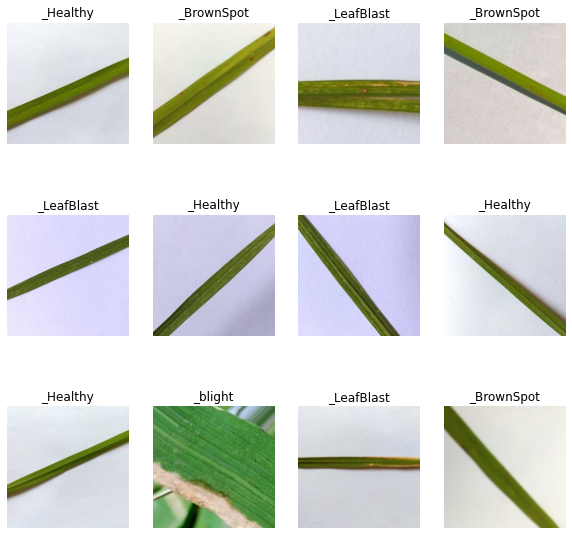

In [6]:
plt.figure(figsize=(10,10))
for image_batch, label_batch in dataset.take(1):
    for i in range(12):
        ax = plt.subplot(3,4,i+1)
        plt.imshow(image_batch[i].numpy().astype("uint8"))
        plt.title(class_names[label_batch[i]])
        plt.axis("off")

In [7]:
len(dataset)

104

In [ ]:
80% ==> training
20% ==> 10% validation, 10% test

In [8]:
train_size = 0.8
len(dataset)*train_size

83.2

In [9]:
train_ds = dataset.take(83)
len(train_ds)

83

In [10]:
test_ds = dataset.skip(83)
len(test_ds)

21

In [11]:
val_size = 0.1
len(dataset)*val_size

10.4

In [12]:
val_ds = test_ds.take(10)
len(val_ds)

10

In [13]:
test_ds = test_ds.skip(10)
len(test_ds)

11

In [14]:
def get_dataset_partitions_tf(ds, train_split=0.8, val_split=0.1, test_split = 0.1, shuffle = True, shuffle_size = 10000):
    
    ds_size = len(ds)
    
    if shuffle:
        ds = ds.shuffle(shuffle_size, seed = 12)
    
    train_size = int(train_split * ds_size)
    
    val_size = int(val_split * ds_size)
    
    train_ds = ds.take(train_size)
    
    val_ds = ds.skip(train_size).take(val_size)
    test_ds = ds.skip(train_size).skip(val_size)
    
    return train_ds, val_ds, test_ds

In [15]:
train_ds, val_ds, test_ds = get_dataset_partitions_tf(dataset)

In [16]:
len(train_ds)

83

In [17]:
len(val_ds)

10

In [18]:
len(test_ds)

11

In [21]:
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size = tf.data.experimental.AUTOTUNE)
val_ds = val_ds.cache().shuffle(1000).prefetch(buffer_size = tf.data.experimental.AUTOTUNE)
test_ds = test_ds.cache().shuffle(1000).prefetch(buffer_size = tf.data.experimental.AUTOTUNE)

In [22]:
resize_and_rescale = tf.keras.Sequential([
    layers.experimental.preprocessing.Resizing(IMAGE_SIZE, IMAGE_SIZE),
    layers.experimental.preprocessing.Rescaling(1.0/255)
])

In [23]:
data_augmentation = tf.keras.Sequential([
    layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
    layers.experimental.preprocessing.RandomRotation(0.2),
])

In [26]:
input_shape = (BATCH_SIZE, IMAGE_SIZE, IMAGE_SIZE, CHANNELS)
n_classes = 4

model = models.Sequential([
    resize_and_rescale,
    layers.Conv2D(32, kernel_size = (3,3), activation='relu', input_shape=input_shape),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(n_classes, activation='softmax'),
])

model.build(input_shape=input_shape)

In [27]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
sequential (Sequential)      (32, 256, 256, 3)         0         
_________________________________________________________________
conv2d_12 (Conv2D)           (32, 254, 254, 32)        896       
_________________________________________________________________
max_pooling2d_12 (MaxPooling (32, 127, 127, 32)        0         
_________________________________________________________________
conv2d_13 (Conv2D)           (32, 125, 125, 64)        18496     
_________________________________________________________________
max_pooling2d_13 (MaxPooling (32, 62, 62, 64)          0         
_________________________________________________________________
conv2d_14 (Conv2D)           (32, 60, 60, 64)          36928     
_________________________________________________________________
max_pooling2d_14 (MaxPooling (32, 30, 30, 64)         

In [28]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

In [29]:
history = model.fit(
    train_ds,
    batch_size=BATCH_SIZE,
    validation_data=val_ds,
    verbose=1,
    epochs=EPOCHS,
)

Epoch 1/50
83/83 [==============================] - 76s 919ms/step - loss: 1.0790 - accuracy: 0.5167 - val_loss: 0.8952 - val_accuracy: 0.6438
Epoch 2/50
83/83 [==============================] - 73s 874ms/step - loss: 0.8469 - accuracy: 0.6111 - val_loss: 0.7219 - val_accuracy: 0.6875
Epoch 3/50
83/83 [==============================] - 76s 919ms/step - loss: 0.7546 - accuracy: 0.6518 - val_loss: 0.8128 - val_accuracy: 0.6062
Epoch 4/50
83/83 [==============================] - 73s 883ms/step - loss: 0.7266 - accuracy: 0.6739 - val_loss: 0.8004 - val_accuracy: 0.6187
Epoch 5/50
83/83 [==============================] - 73s 885ms/step - loss: 0.6872 - accuracy: 0.6922 - val_loss: 0.6537 - val_accuracy: 0.6875
Epoch 6/50
83/83 [==============================] - 76s 912ms/step - loss: 0.6783 - accuracy: 0.6990 - val_loss: 0.6716 - val_accuracy: 0.6844
Epoch 7/50
83/83 [==============================] - 75s 903ms/step - loss: 0.6769 - accuracy: 0.6986 - val_loss: 0.6611 - val_accuracy: 0.6750

In [30]:
scores = model.evaluate(test_ds)

11/11 [==============================] - 2s 192ms/step - loss: 0.3578 - accuracy: 0.9290


In [31]:
scores

[0.35778144001960754, 0.9289772510528564]

In [32]:
history

In [33]:
history.params

{'verbose': 1, 'epochs': 50, 'steps': 83}

In [34]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [35]:
history.history['accuracy']

[0.5167427659034729,
 0.6111111044883728,
 0.6518265008926392,
 0.6738964915275574,
 0.6921613216400146,
 0.6990106701850891,
 0.698630154132843,
 0.7009132504463196,
 0.7012937664985657,
 0.710806667804718,
 0.7222222089767456,
 0.7229832410812378,
 0.7271689772605896,
 0.7484779357910156,
 0.745814323425293,
 0.7602739930152893,
 0.7640791535377502,
 0.7823439836502075,
 0.7751141786575317,
 0.7914764285087585,
 0.7903348803520203,
 0.8051750659942627,
 0.8089802265167236,
 0.8203957676887512,
 0.831811249256134,
 0.8500760793685913,
 0.8436073064804077,
 0.866057813167572,
 0.848934531211853,
 0.8257229924201965,
 0.8736681938171387,
 0.866057813167572,
 0.8835616707801819,
 0.9041095972061157,
 0.9277016520500183,
 0.8976407647132874,
 0.9341704845428467,
 0.9516742825508118,
 0.9497717022895813,
 0.8816590309143066,
 0.9147641062736511,
 0.9729832410812378,
 0.9649924039840698,
 0.9672755002975464,
 0.9714611768722534,
 0.9847792983055115,
 0.9505327343940735,
 0.9726027250289917,

In [36]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

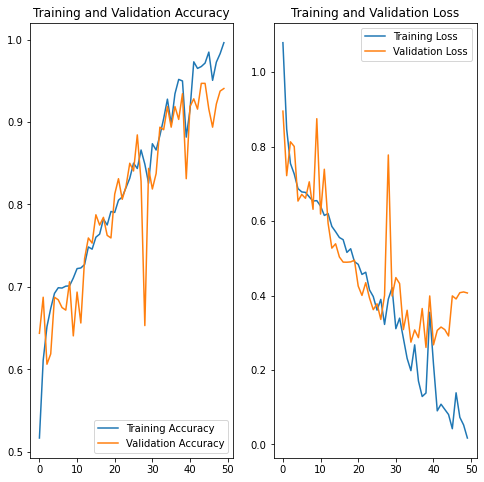

In [38]:
plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(range(EPOCHS), acc, label='Training Accuracy')
plt.plot(range(EPOCHS), val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(range(EPOCHS), loss, label='Training Loss')
plt.plot(range(EPOCHS), val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

first image to predict
actual label: _LeafBlast
predicted label: _LeafBlast


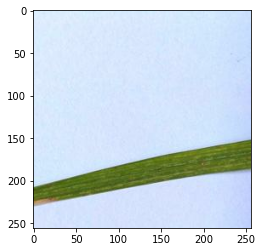

In [49]:
import numpy as np
for images_batch, labels_batch in test_ds.take(1):
    
    first_image = images_batch[0].numpy().astype('uint8')
    first_label = labels_batch[0].numpy()
    
    print("first image to predict")
    plt.imshow(first_image)
    print("actual label:",class_names[first_label])
    
    batch_prediction = model.predict(images_batch)
    print("predicted label:",class_names[np.argmax(batch_prediction[0])])

In [50]:
def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i].numpy())
    img_array = tf.expand_dims(img_array, 0)

    predictions = model.predict(img_array)

    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])), 3)
    return predicted_class, confidence

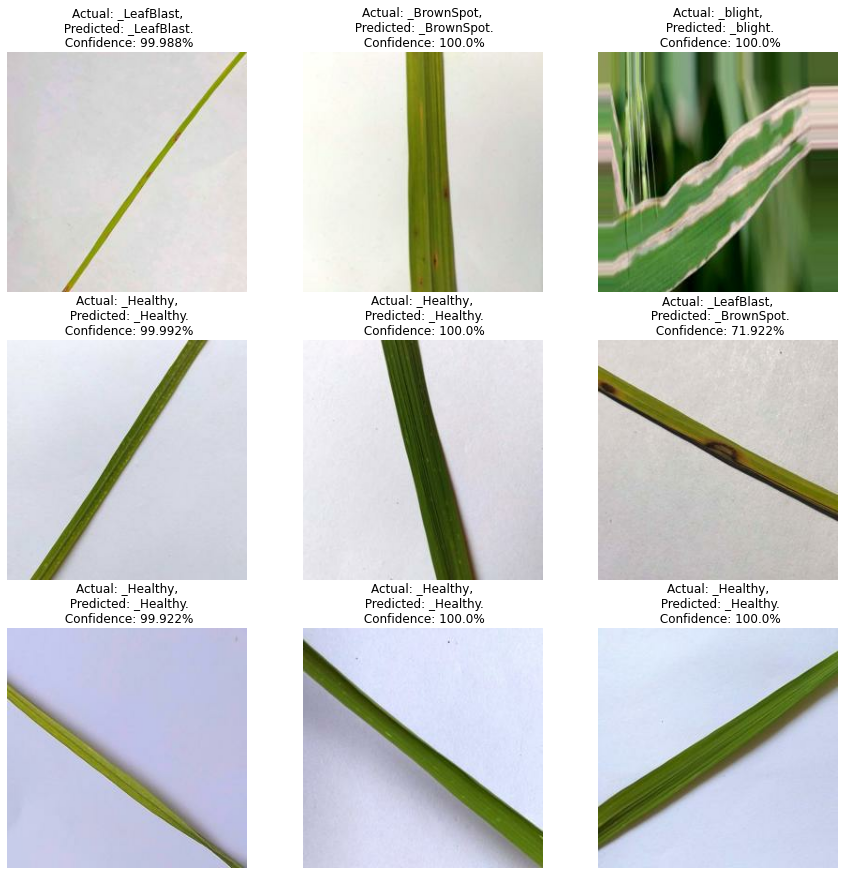

In [51]:
plt.figure(figsize=(15, 15))
for images, labels in test_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        
        predicted_class, confidence = predict(model, images[i].numpy())
        actual_class = class_names[labels[i]] 
        
        plt.title(f"Actual: {actual_class},\n Predicted: {predicted_class}.\n Confidence: {confidence}%")
        
        plt.axis("off")

In [57]:
import os
model_version=max([int(i) for i in os.listdir("../models")+[0]])+1
model.save(f"../models/{model_version}")

INFO:tensorflow:Assets written to: ../models/3\assets
